<a href="https://colab.research.google.com/github/hiu04/Attrition_Project/blob/main/Attrition_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("/content/Attrition View.csv")
data.head(3)

,CUSTOMER_ID,GENDER_ID,FIRST_NAME,LAST_NAME,PHONE_1,EMAIL,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,...,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
0,1,2,Leonor,Cummerata,781-757-3537,Leonor.Cummerata@nola.biz,44,5080,0.390,1,...,PLATINUM,Employed full-time,56049,43703,26666,26666,28642,26666,22963,20500
1,2,1,Ima,Labadie,505-339-5197,Ima.Labadie@allie.tv,34,4970,0.356,0,...,GOLD,Employed full-time,52098,40740,26666,26666,26666,26666,21481,20500
2,3,1,Brycen,Hermiston,309-713-5431,Brycen.Hermiston@kristina.biz,39,9250,0.628,1,...,GOLD,Employed full-time,52098,40740,24691,24691,26666,24691,21481,20500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CUSTOMER_ID                         65000 non-null  int64  
 1   GENDER_ID                           65000 non-null  int64  
 2   FIRST_NAME                          65000 non-null  object 
 3   LAST_NAME                           65000 non-null  object 
 4   PHONE_1                             65000 non-null  object 
 5   EMAIL                               65000 non-null  object 
 6   AGE                                 65000 non-null  int64  
 7   ENERGY_USAGE_PER_MONTH              65000 non-null  int64  
 8   ENERGY_EFFICIENCY                   65000 non-null  float64
 9   IS_REGISTERED_FOR_ALERTS            65000 non-null  int64  
 10  OWNS_HOME                           65000 non-null  int64  
 11  COMPLAINTS                          65000

There are 65000 observations and 41 variables in this dataset. Notice that CURRENT_CONTRACT and SEGMENT have missing values.

## Data Pre-processing

### Create variable lists and update

- Unnecessary variables

No common 'CUSTOMER_ID', 'FIRST_NAME', 'LAST_NAME', 'PHONE_1' or 'EMAIL' value in the dataset.

In [3]:
# Unnecessary columns
non_feature_cols = ['CUSTOMER_ID', 'FIRST_NAME', 'LAST_NAME', 'EMAIL']

# Drop unnecessary columns and update dataset
data = data.drop(columns=non_feature_cols)

- Dummy variables

In [4]:
# Function to check if a column is a dummy variable
def is_dummy(column):
    unique_values = column.unique()
    return set(unique_values) == {0, 1}

# Identifying dummy variables in the dataset
dummy_variables = [column for column in data.columns if is_dummy(data[column])]

# Displaying the dummy variables
dummy_variables[:], len(dummy_variables)

(['IS_REGISTERED_FOR_ALERTS',
  'OWNS_HOME',
  'COMPLAINTS',
  'ATTRITION_STATUS',
  'HAS_THERMOSTAT',
  'HAS_HOME_AUTOMATION',
  'PV_ZONING',
  'WIND_ZONING',
  'IS_CAR_OWNER',
  'HAS_EV',
  'HAS_PV',
  'HAS_WIND',
  'EBILL',
  'IN_WARRANTY'],
 14)

In [ ]:
pd.unique(data['GENDER_ID']) # Can add to dummy variables

array([2, 1])

In [5]:
# Adjusting binary variables encoded as 1 and 2 to be 0 and 1
data['GENDER_ID'] = data['GENDER_ID'] - 1

In [6]:
# Create dummy variables list (Total 15 dummy variables)
dummy_vars = ['GENDER_ID', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
              'ATTRITION_STATUS','HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
              'PV_ZONING','WIND_ZONING', 'IS_CAR_OWNER','HAS_EV', 'HAS_PV',
              'HAS_WIND','EBILL','IN_WARRANTY']

- Target vairable and numerical variable lists

In [7]:
# Define target (dependent) variable
target_col = 'ATTRITION_STATUS'

numerical_vars = ['AGE', 'ENERGY_EFFICIENCY',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
                  'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'ENERGY_USAGE_PER_MONTH', 'TENURE']

- Categorical Variables

In [11]:
# Identifying categorical variables by excluding dummy, target and
# numerical variables
categorical_vars = [column for column in data.columns # == "object"
                    if column not in (dummy_vars + numerical_vars + [target_col])]

In [9]:
categorical_vars, len(categorical_vars)

(['PHONE_1',
  'SMART_METER_COMMENTS',
  'CITY',
  'CURRENT_OFFER',
  'CURRENT_CONTRACT',
  'CURRENT_ISSUE',
  'MARITAL_STATUS',
  'EDUCATION',
  'SEGMENT',
  'EMPLOYMENT'],
 10)

### EDA

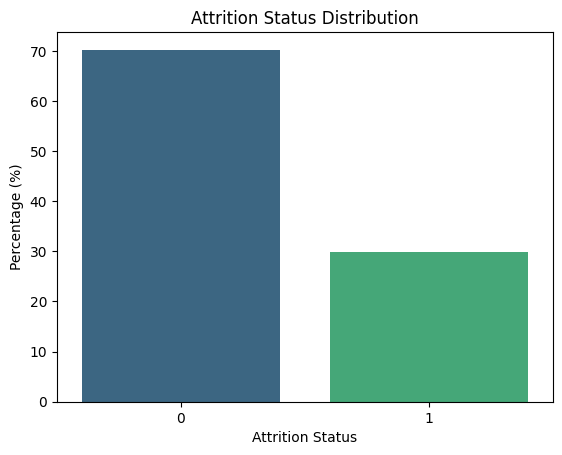

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Counting the number of instances for each attrition status
attrition_counts = data['ATTRITION_STATUS'].\
value_counts(normalize=True) * 100

# Plotting the attrition rate
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='viridis')
plt.title('Attrition Status Distribution')
plt.xlabel('Attrition Status')
plt.ylabel('Percentage (%)')
plt.xticks(range(len(attrition_counts.index)), attrition_counts.index)

plt.show()

#### Numerical variables

- Heatmap (numerical variables)

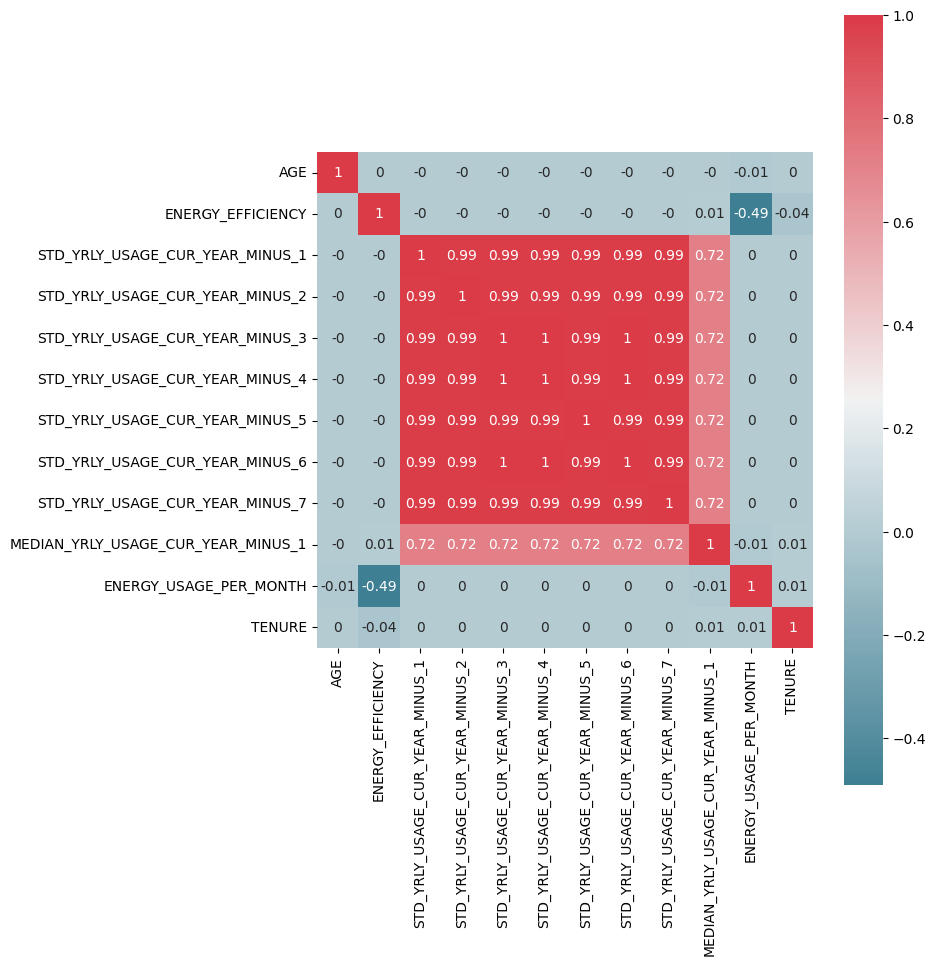

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# check correlation between numerical features
f, ax = plt.subplots(figsize=(8, 10))
corr = data[numerical_vars].corr()
corr = corr.round(2)
temp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
                   cmap=sns.diverging_palette(220, 10, as_cmap=True),
                   square=True, ax=ax,annot=True)

Those STU_YRLY_USAGE_YEAR_MINUS variables are highly correlated, we can only keep **STU_YRLY_USAGE_YEAR_MINUS_1** in the dataset.

In [16]:
# Correlated columns
cols = ['STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7']

# Drop correlated columns and update dataset
data = data.drop(columns=cols)

In [17]:
# Drop and update numerical_vars list
numerical_vars = [i for i in numerical_vars if i not in cols]

In [ ]:
# Length of currentnumerical variables list
len(numerical_vars)

6

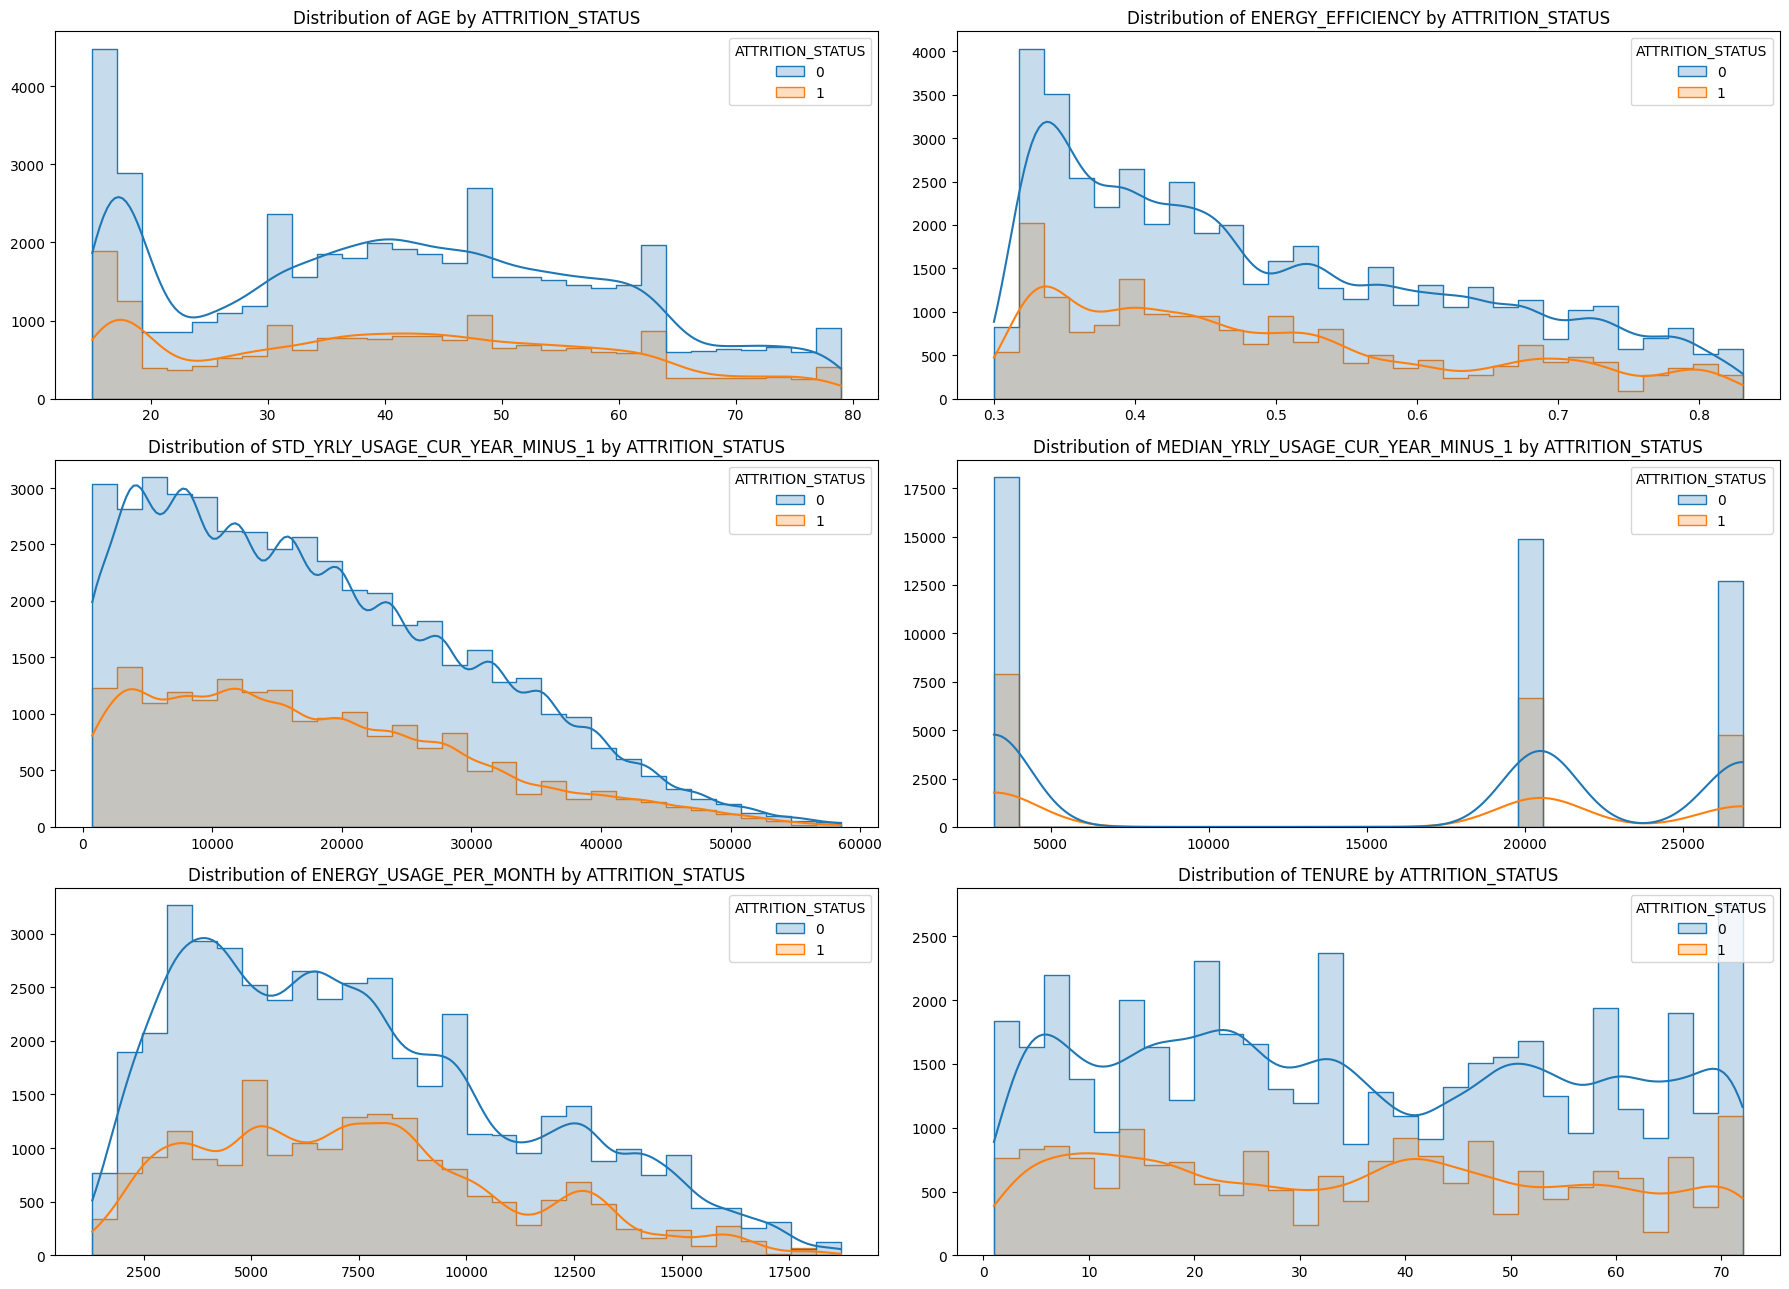

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(18, 13))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for i, column in enumerate(numerical_vars):
    sns.histplot(data=data, x=column, hue='ATTRITION_STATUS', kde=True,
                 bins=30, ax=axes[i], element='step')
    axes[i].set_title(f'Distribution of {column} by ATTRITION_STATUS')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

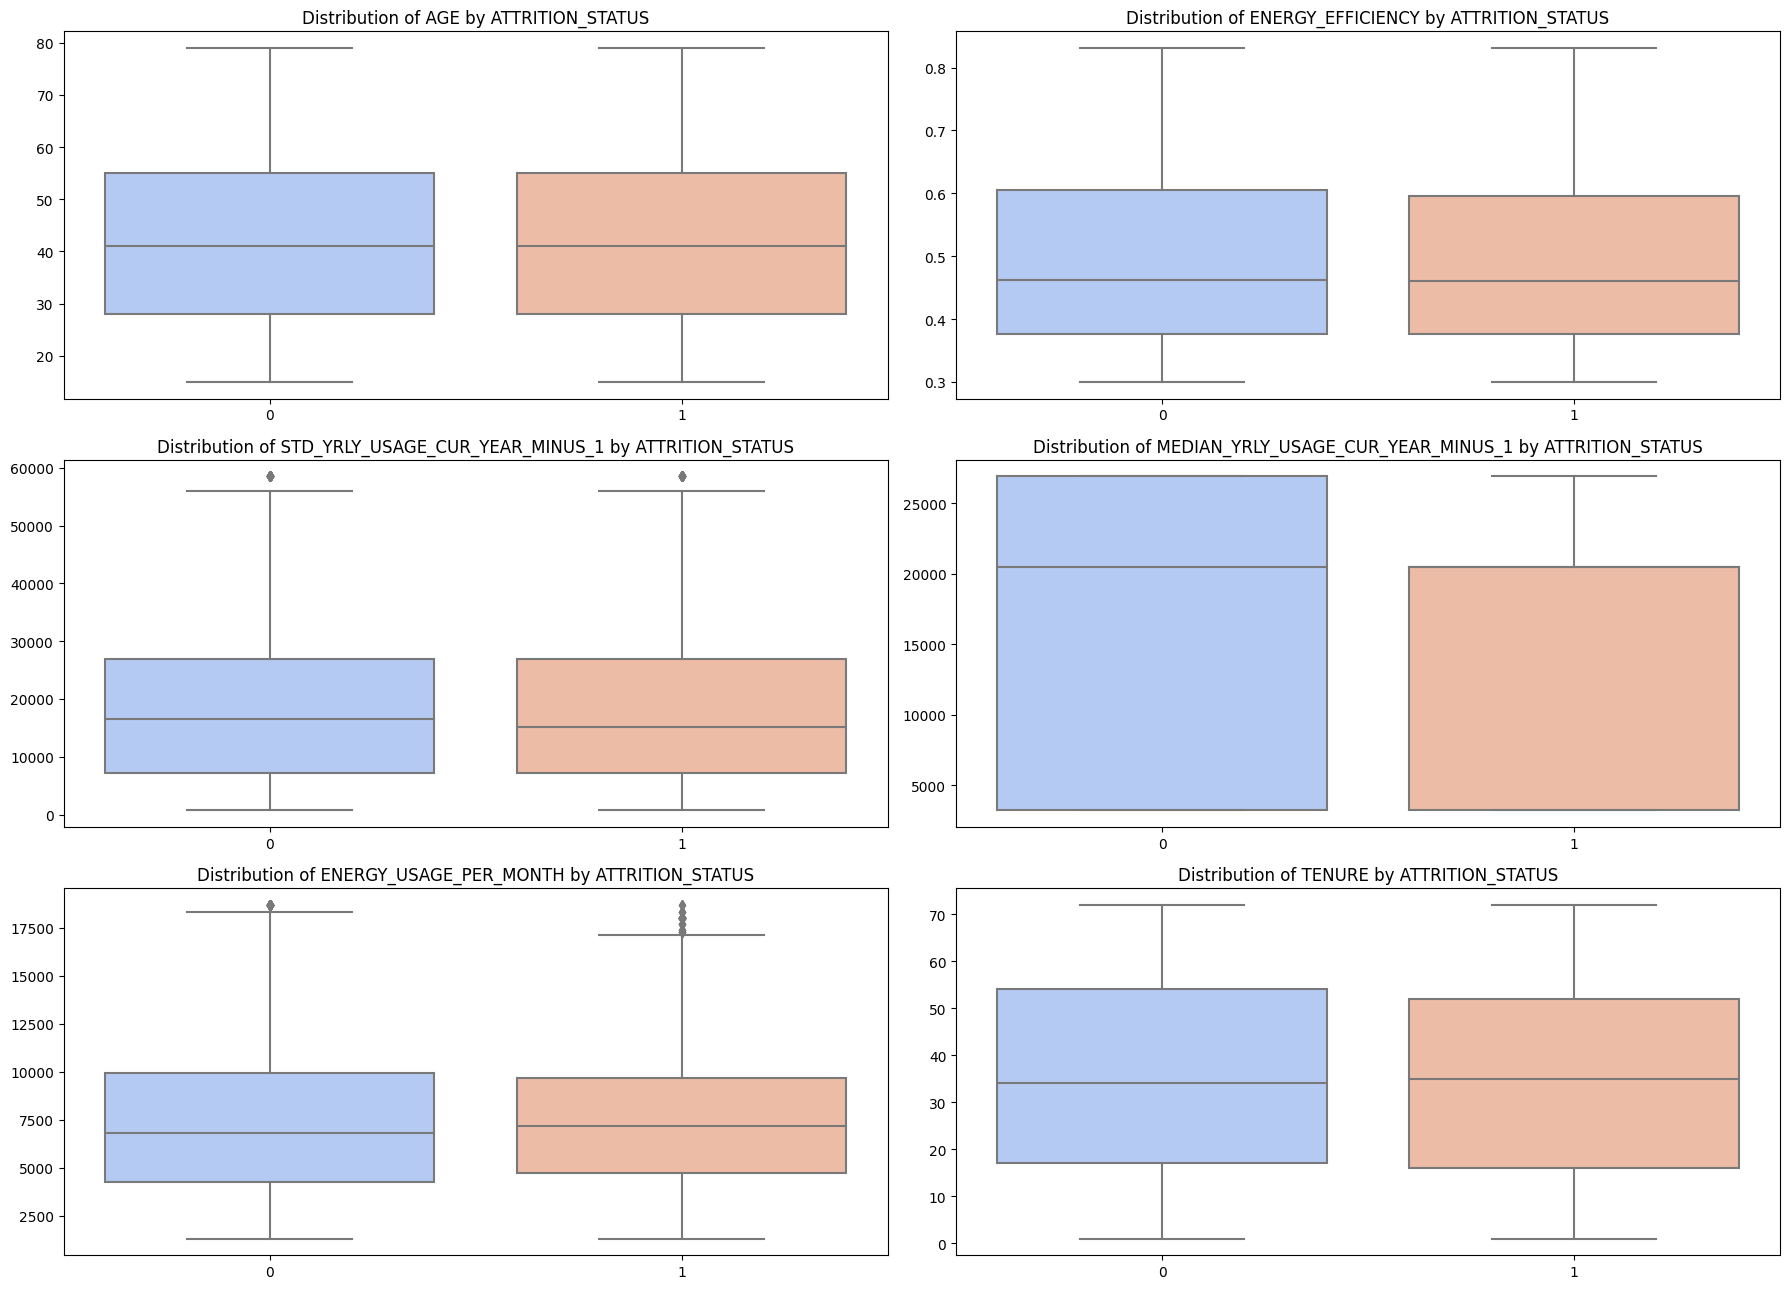

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(18, 13))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for i, column in enumerate(numerical_vars):
    sns.boxplot(x='ATTRITION_STATUS', y=column,
                data=data, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by ATTRITION_STATUS')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Distributions are similar for (attrition_status = 1) and (=0) for each numerical variables. The median values are similar as well.

#### Categorical Variables

- Missing Values


Only two categorical variables have missing values.

In [ ]:
# Replacing missing values with the median of each column for numerical variables
# data = data.fillna(data.median(numeric_only=True))

# Replacing missing values in categorical columns with the mode of each column
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
# Checking if there are still any missing values in the dataset
data.isnull().sum().sum()

0

In [ ]:
for var in categorical_vars:
    unique_levels = pd.unique(data[var])
    print(f"{var}: {unique_levels}")
    print("-----"*18)

SMART_METER_COMMENTS: ['Negative' 'Neutral' 'Positive']
------------------------------------------------------------------------------------------
CITY: ['Mountain View' 'Sunnyvale' 'Santa Clara' 'Palo Alto' 'Cupertino']
------------------------------------------------------------------------------------------
CURRENT_OFFER: ['Home Energy Audits' 'Free Energy Audits' 'Rooftop Solar'
 'New Construction Incentives' 'Small Scale Wind' 'Customer Rebates'
 'Integrated Solar' 'Demand Response Program' 'Other']
------------------------------------------------------------------------------------------
CURRENT_CONTRACT: ['Time of Use' 'Dynamic Pricing 240 minute plan']
------------------------------------------------------------------------------------------
CURRENT_ISSUE: ['Replacement phone' 'Billing Issue' 'Drop Calls' 'Best friend cancels'
 'Power Outage' 'Low Voltage' 'Equipment failure' 'GPRS Issue'
 'Network Issue']
------------------------------------------------------------------------

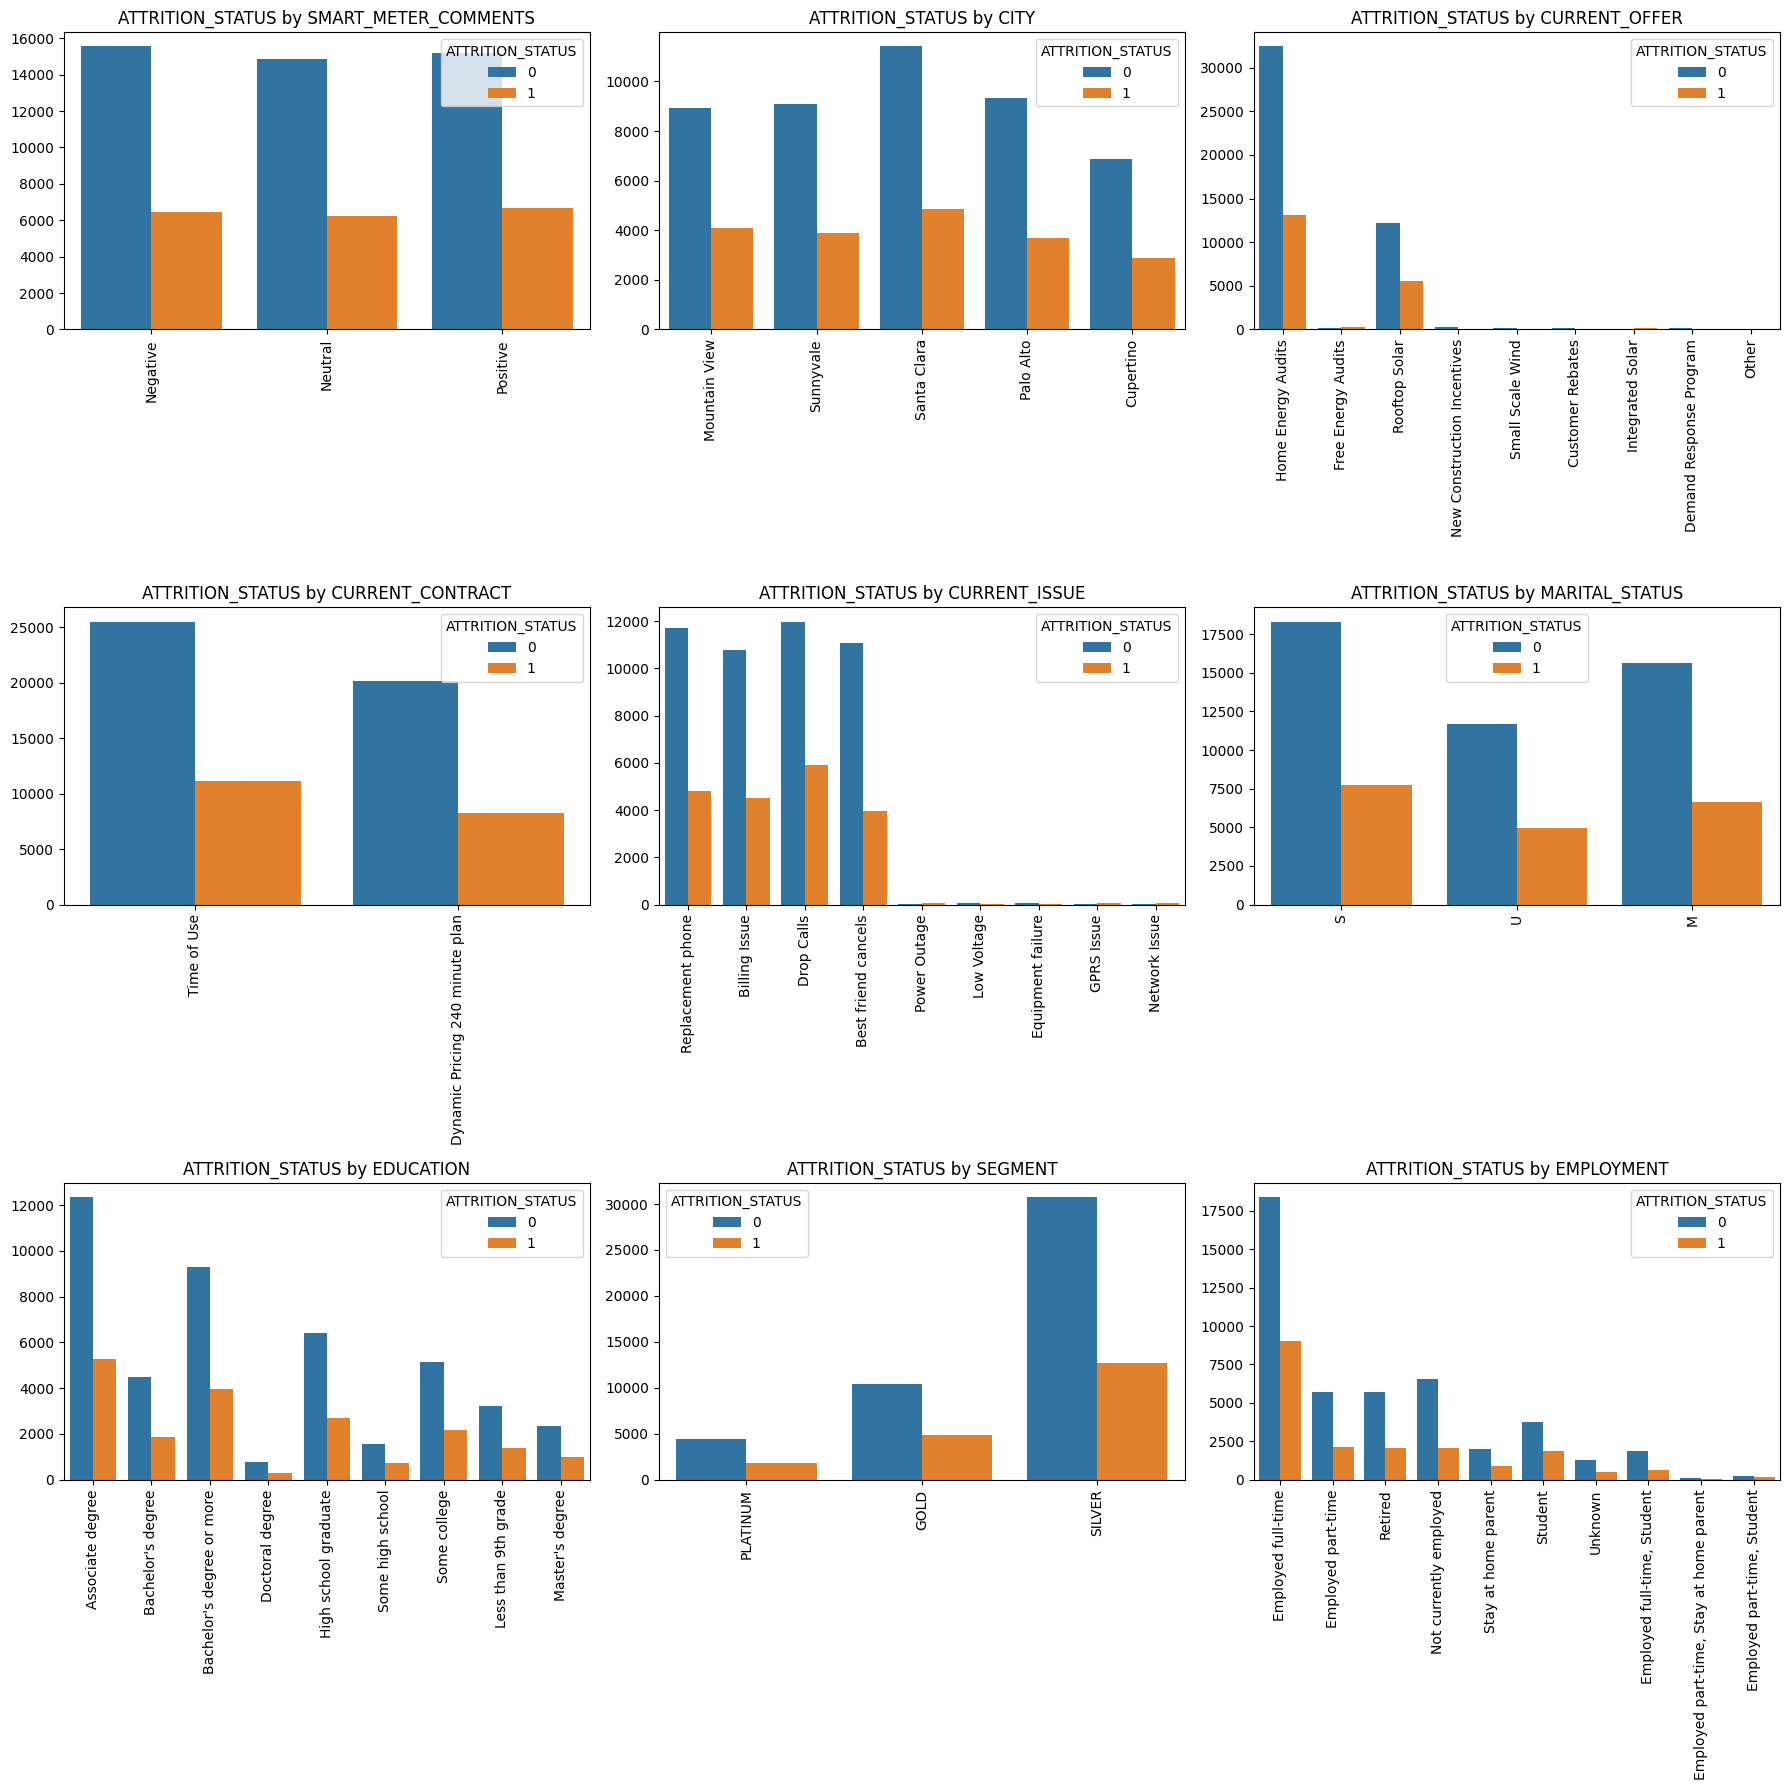

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18,18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(categorical_vars):
  sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].legend(title='ATTRITION_STATUS')
  axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


For each categorical variables and the levels within that variable, the count of (attrition = 0) is larger than (attrition = 1). This leads to the inbalance issue when modelling.

#### Dummy Variables

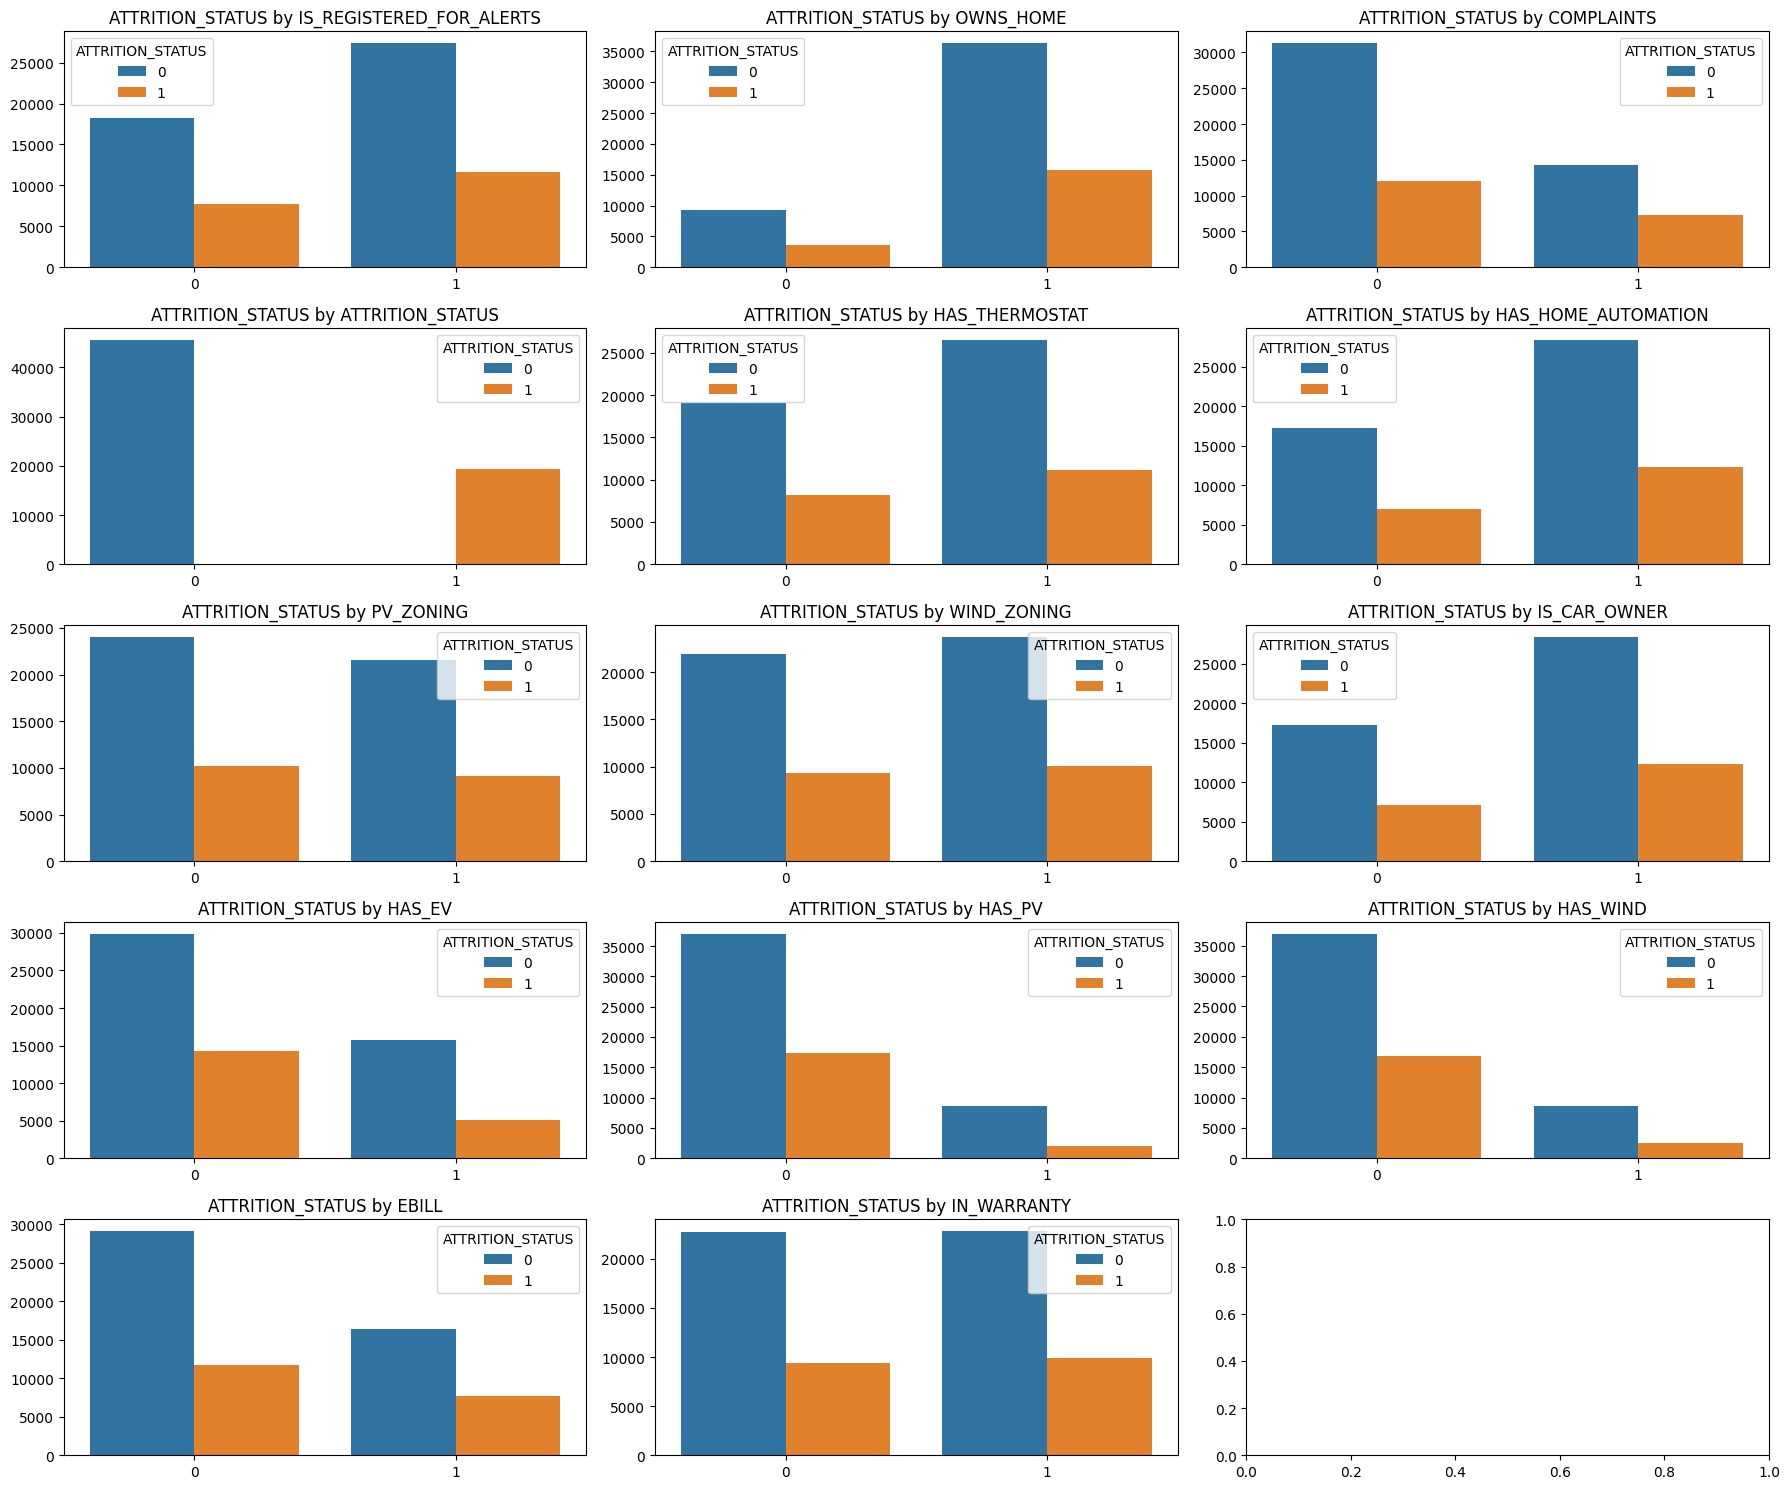

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(18,15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(dummy_variables):
  sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].legend(title='ATTRITION_STATUS')

plt.tight_layout()
plt.show()

Unbalanced issues happen here as well.

### Extract information from "PHONE1"

In [22]:
# Extract the first three digits of the PHONE_1 (area or region information)
data['Region'] = data['PHONE_1'].str[:3]

# Group by the extracted phone prefixes
region_clusters = data.groupby('Region').size().\
sort_values(ascending=False)

# Display the top 10 clusters
region_clusters.head(10)

Region
630    650
305    650
770    585
757    585
773    585
336    585
214    585
508    585
732    520
803    520
dtype: int64

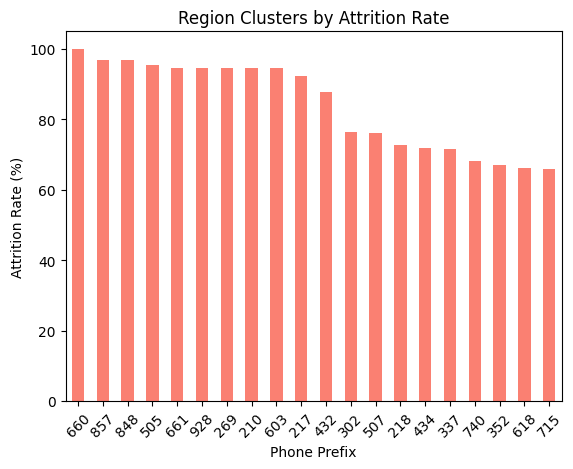

In [29]:
# Consider '1' as 'Left' and '0' as 'Stayed'
# Calculate attrition rates within each phone prefix cluster
region_attrition_rates = data.groupby('Region')['ATTRITION_STATUS'].mean() * 100

# Sorting the clusters by the rate of attrition
region_attrition_rates_sorted = region_attrition_rates.sort_values(ascending=False)

# Plotting the top 10 clusters by attrition rate
region_attrition_rates_sorted.head(20).plot(kind='bar', color='salmon')
plt.title('Region Clusters by Attrition Rate')
plt.xlabel('Phone Prefix')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

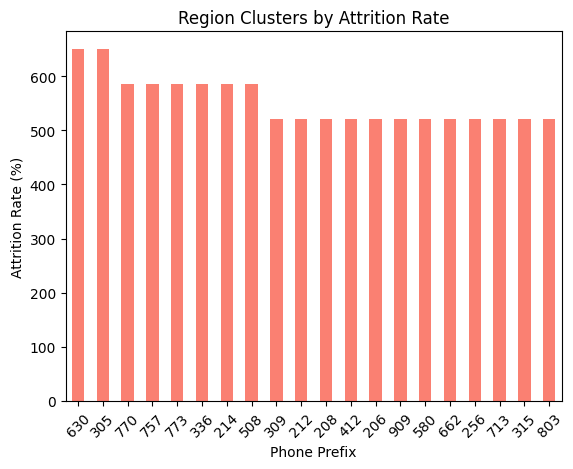

In [30]:
# Sorting the clusters by the number of accounts
region_clusters_sorted = region_clusters.sort_values(ascending=False)

# Plotting the top 10 clusters by region
region_clusters_sorted.head(20).plot(kind='bar', color='salmon')
plt.title('Region Clusters by Attrition Rate')
plt.xlabel('Phone Prefix')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Correct the DataFrame for the combined data
comparison_data = pd.DataFrame({
    'Phone Prefix': region_clusters.index,
    'Account Count': region_clusters.values,
    'Attrition Rate': region_attrition_rates.values
})


<ipython-input-35-58a9f0a48bd3>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(subset_data['Phone Prefix'], rotation=90, ha='right')


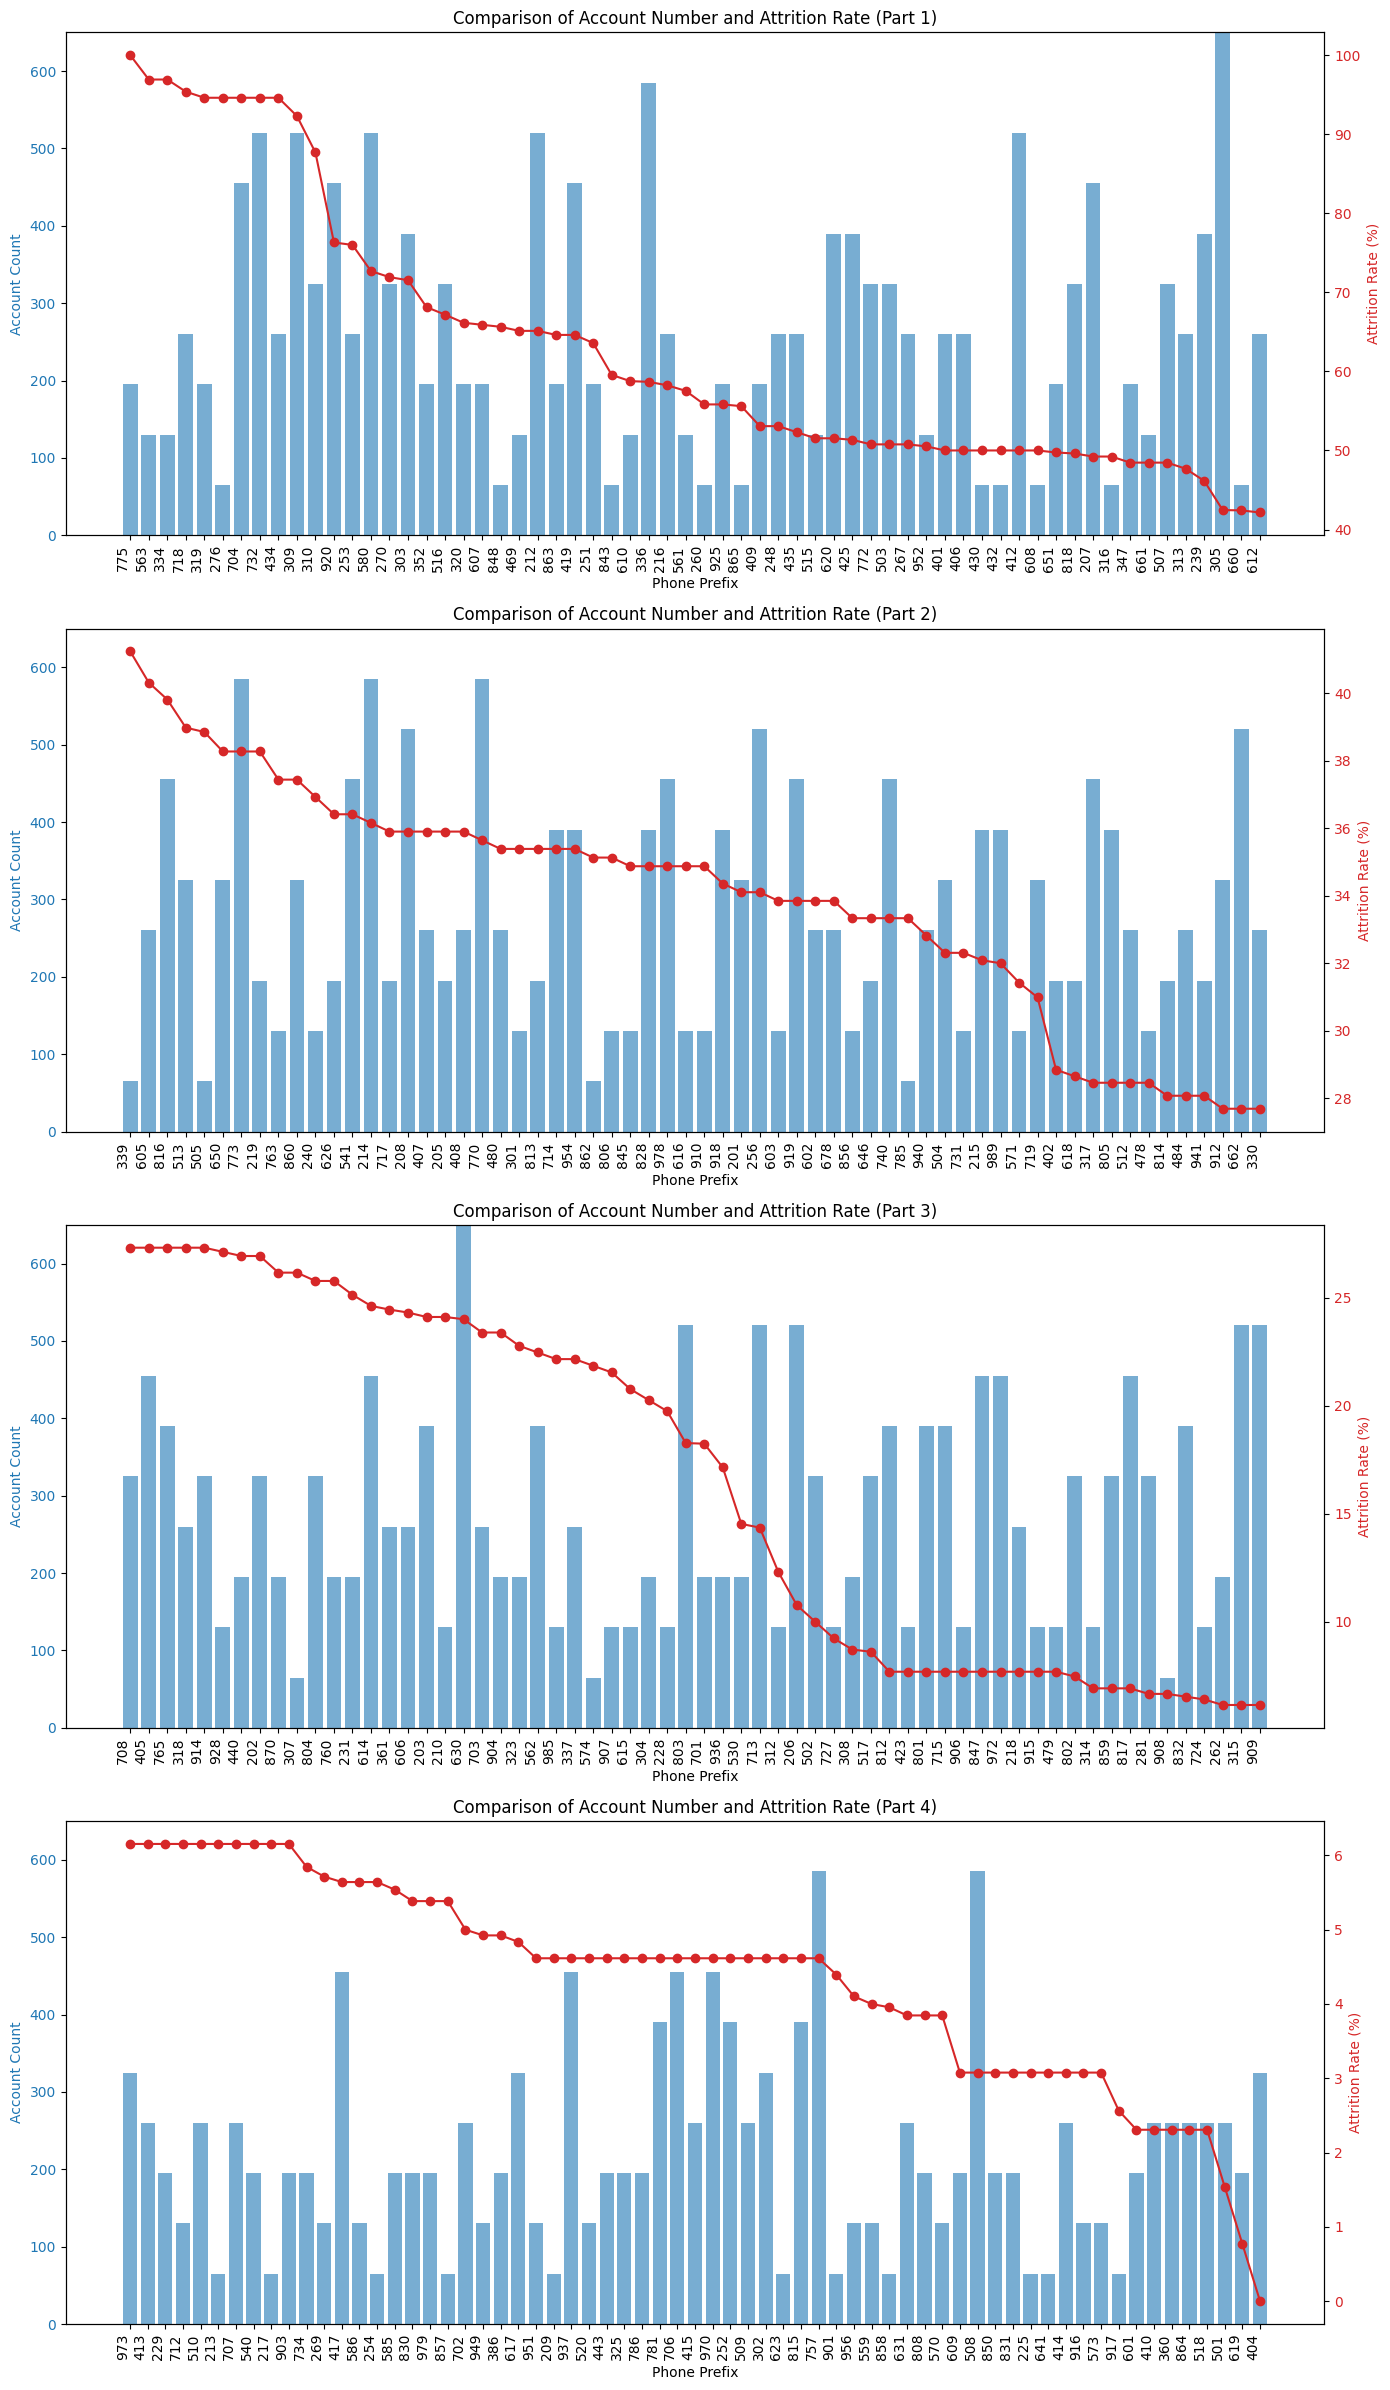

In [35]:
# Define the function to split data and create subplots with a shared y-axis for the account counts
def split_data_and_create_shared_y_subplots(data, parts, fig_size):
    split_size = len(data) // parts
    fig, axs = plt.subplots(parts, 1, figsize=fig_size, sharey='row')

    # Find the max account count for setting y-axis limits
    max_account_count = data['Account Count'].max()

    for i in range(parts):
        # Determine the start and end index for each part
        start_idx = i * split_size
        # For the last part, make sure to include the end of the dataset
        end_idx = (i + 1) * split_size if i < parts - 1 else len(data)

        # Subset the data
        subset_data = data.iloc[start_idx:end_idx]

        # Create subplots
        ax1 = axs[i]
        ax2 = ax1.twinx()

        # Bar graph for the account number
        color = 'tab:blue'
        ax1.set_xlabel('Phone Prefix')
        ax1.set_ylabel('Account Count', color=color)
        ax1.bar(subset_data['Phone Prefix'], subset_data['Account Count'], color=color, alpha=0.6)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_ylim(0, max_account_count)  # Set uniform y-axis limits for account count

        # Line graph for the attrition rate
        color = 'tab:red'
        ax2.set_ylabel('Attrition Rate (%)', color=color)
        ax2.plot(subset_data['Phone Prefix'], subset_data['Attrition Rate'], color=color, marker='o')
        ax2.tick_params(axis='y', labelcolor=color)

        # Title for each subplot
        ax1.set_title(f'Comparison of Account Number and Attrition Rate (Part {i + 1})')

        # Set x-axis tick labels for each subplot
        ax1.set_xticklabels(subset_data['Phone Prefix'], rotation=90, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Sort the data by Attrition Rate in descending order for visualization
sorted_data = comparison_data.sort_values(by='Attrition Rate', ascending=False).reset_index(drop=True)

# Create four subplots with a shared y-axis for account counts after sorting
split_data_and_create_shared_y_subplots(sorted_data, 4, (14, 24))

Top six region with high attrition rate but the number of account are relatively low.